# Loading the adult dataset

In [1]:
import pandas as pd
import numpy as np
# Change this to the location of your wbpc.data file
file_raw_data = "Project/datasets/adult.data"

raw_data = pd.read_csv(file_raw_data, header=None)

raw_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
file_raw_data_test = "Project/datasets/adult_test.data"

raw_data_test = pd.read_csv(file_raw_data_test, header=None)

raw_data_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


# Preprocessing the adult dataset

## creating the data_transform function

In [3]:
# dropping null values in the dataset
raw_data = raw_data.dropna()
df = raw_data

In [4]:
test_df = raw_data_test
test_df[14].unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [5]:
test_df[14]

0         <=50K.
1         <=50K.
2          >50K.
3          >50K.
4         <=50K.
          ...   
16276     <=50K.
16277     <=50K.
16278     <=50K.
16279     <=50K.
16280      >50K.
Name: 14, Length: 16281, dtype: object

In [6]:
# creating a function that transforms the non-numerical data in the dataset into integers

def data_transform(df):
    
    ### START OF transforming column 1
    
    # create a list of our conditions
    employment_status_conditions = [
        (df[1] == " State-gov"),
        (df[1] == " Self-emp-not-inc"),
        (df[1] == " Private"),
        (df[1] == " Federal-gov"),
        (df[1] == " Local-gov"),
        (df[1] == " Self-emp-inc"),
        (df[1] == " Without-pay"),
        (df[1] == " Never-worked"),
        (df[1] == " ?"),
        ]

    # create a list of the values we want to assign for each condition
    employment_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['employment_status'] = np.select(employment_status_conditions, employment_values)
    
    
    ### END OF transforming column 1
    
    ########################################################################################################################
    
    ### START OF transforming column 5
    
     # create a list of our conditions
    marriage_status_conditions = [
        (df[5] == " Never-married"),
        (df[5] == " Married-civ-spouse"),
        (df[5] == " Divorced"),
        (df[5] == " Married-spouse-absent"),
        (df[5] == " Separated"),
        (df[5] == " Married-AF-spouse"),
        (df[5] == " Widowed"),
        ]

    # create a list of the values we want to assign for each condition
    marriage_values = [1, 2, 3, 4, 5, 6, 7]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['marriage_status'] = np.select(marriage_status_conditions, marriage_values)
    
    ### END OF transforming column 5
    
    ########################################################################################################################
    
    ### START OF transforming column 3
    
     # create a list of our conditions
    education_status_conditions = [
        (df[3] == " Bachelors"),
        (df[3] == " HS-grad"),
        (df[3] == " 11th"),
        (df[3] == " Masters"),
        (df[3] == " 9th"),
        (df[3] == " Some-college"),
        (df[3] == " Assoc-acdm"),
        (df[3] == " Assoc-voc"),
        (df[3] == " 7th-8th"),
        (df[3] == " Doctorate"),
        (df[3] == " Prof-school"),
        (df[3] == " 5th-6th"),
        (df[3] == " 10th"),
        (df[3] == " 1st-4th"),
        (df[3] == " Preschool"),
        (df[3] == " 12th"),
        ]

    # create a list of the values we want to assign for each condition
    education_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['education_status'] = np.select(education_status_conditions, education_values)
    
    ### END OF transforming column 3
    
    ########################################################################################################################
    
     ### START OF transforming column 6
    
     # create a list of our conditions
    employment_classification_conditions = [
        (df[6] == " Adm-clerical"),
        (df[6] == " Exec-managerial"),
        (df[6] == " Handlers-cleaners"),
        (df[6] == " Prof-specialty"),
        (df[6] == " Other-service"),
        (df[6] == " Sales"),
        (df[6] == " Craft-repair"),
        (df[6] == " Transport-moving"),
        (df[6] == " Farming-fishing"),
        (df[6] == " Machine-op-inspct"),
        (df[6] == " Tech-support"),
        (df[6] == " Protective-serv"),
        (df[6] == " Armed-Forces"),
        (df[6] == " Priv-house-serv"),
        (df[6] == " ?"),
        ]

    # create a list of the values we want to assign for each condition
    employment_classification_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['employment_classification'] = np.select(employment_classification_conditions, employment_classification_values)
    
    ### END OF transforming column 6
    
    ########################################################################################################################
    
    ### START OF transforming column 7
    
    # create a list of our conditions
    relationship_status_conditions = [
        (df[7] == " Not-in-family"),
        (df[7] == " Husband"),
        (df[7] == " Wife"),
        (df[7] == " Own-child"),
        (df[7] == " Unmarried"),
        (df[7] == " Other-relative"),
        ]

    # create a list of the values we want to assign for each condition
    relationship_status_values = [1, 2, 3, 4, 5, 6]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['relationship_status'] = np.select(relationship_status_conditions, relationship_status_values)
    
    ### END OF transforming column 7
    
    ########################################################################################################################
    
    ### START OF transforming column 8
    
    # create a list of our conditions
    race_conditions = [
        (df[8] == " White"),
        (df[8] == " Black"),
        (df[8] == " Asian-Pac-Islander"),
        (df[8] == " Amer-Indian-Eskimo"),
        (df[8] == " Other"),
        ]

    # create a list of the values we want to assign for each condition
    race_values = [1, 2, 3, 4, 5]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['race'] = np.select(race_conditions, race_values)
    
    ### END OF transforming column 8
    
    ########################################################################################################################
    
    ### START OF transforming column 9
    
    # create a list of our conditions
    sex_conditions = [
        (df[9] == " Male"),
        (df[9] == " Female"),
        ]

    # create a list of the values we want to assign for each condition
    sex_values = [1, 2]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['sex'] = np.select(sex_conditions, sex_values)
    
    ### END OF transforming column 9
    
    ########################################################################################################################
    
    ### START OF transforming column 13
    
    # create a list of our conditions
    native_country_conditions = [
        (df[13] == " United-States"),
        (df[13] == " Cuba"),
        (df[13] == " Jamaica"),
        (df[13] == " India"),
        (df[13] == " ?"),
        (df[13] == " Mexico"),
        (df[13] == " South"),
        (df[13] == " Puerto-Rico"),
        (df[13] == " Honduras"),
        (df[13] == " England"),
        (df[13] == " Canada"),
        (df[13] == " Germany"),
        (df[13] == " Iran"),
        (df[13] == " Philippines"),
        (df[13] == " Italy"),
        (df[13] == " Poland"),
        (df[13] == " Columbia"),
        (df[13] == " Cambodia"),
        (df[13] == " Thailand"),
        (df[13] == " Ecuador"),
        (df[13] == " Laos"),
        (df[13] == " Taiwan"),
        (df[13] == " Haiti"),
        (df[13] == " Portugal"),
        (df[13] == " Dominican-Republic"),
        (df[13] == " El-Salvador"),
        (df[13] == " France"),
        (df[13] == " Guatemala"),
        (df[13] == " China"),
        (df[13] == " Japan"),
        (df[13] == " Yugoslavia"),
        (df[13] == " Peru"),
        (df[13] == " Outlying-US(Guam-USVI-etc"),
        (df[13] == " Scotland"),
        (df[13] == " Trinadad&Tobago"),
        (df[13] == " Greece"),
        (df[13] == " Nicaragua"),
        (df[13] == " Vietnam"),
        (df[13] == " Hong"),
        (df[13] == " Ireland"),
        (df[13] == " Hungary"),
        (df[13] == " Holand-Netherlands"),
        
        
        ]

    # create a list of the values we want to assign for each condition
    native_country_values = [x for x in range(1,43)]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['native_country'] = np.select(native_country_conditions, native_country_values)
    
    ### END OF transforming column 13
    
    ########################################################################################################################
    
     ### START OF transforming column 14
    
    # create a list of our conditions
    target_conditions = [
        (df[14] == " <=50K"),
        (df[14] == " >50K"),
        ]

    # create a list of the values we want to assign for each condition
    target_values = [0, 1]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['target'] = np.select(target_conditions, target_values)
    
    ### END OF transforming column 14
    
    ########################################################################################################################
    
    # START OF dropping existing redundant columns
    
    df.drop(1, inplace=True, axis=1)
    df.drop(5, inplace=True, axis=1)
    df.drop(3, inplace=True, axis=1)
    df.drop(6, inplace=True, axis=1)
    df.drop(7, inplace=True, axis=1)
    df.drop(8, inplace=True, axis=1)
    df.drop(9, inplace=True, axis=1)
    df.drop(13, inplace=True, axis=1)
    df.drop(14, inplace=True, axis=1)
    
    
    df.rename(columns={0:'age', 2:'final_weight', 4:"years_studied", 10:"capital_gain", 11: "capital_loss", 12: "hours_per_week"}, inplace=True)
    
    # END OF dropping existing redundant columns
    return df

## running the data_transform function in our df

In [7]:
df = data_transform(df)
df

,age,final_weight,years_studied,capital_gain,capital_loss,hours_per_week,employment_status,marriage_status,education_status,employment_classification,relationship_status,race,sex,native_country,target
0,39,77516,13,2174,0,40,1,1,1,1,1,1,1,1,0
1,50,83311,13,0,0,13,2,2,1,2,2,1,1,1,0
2,38,215646,9,0,0,40,3,3,2,3,1,1,1,1,0
3,53,234721,7,0,0,40,3,2,3,3,2,2,1,1,0
4,28,338409,13,0,0,40,3,2,1,4,3,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,3,2,7,11,3,1,2,1,0
32557,40,154374,9,0,0,40,3,2,2,10,2,1,1,1,1
32558,58,151910,9,0,0,40,3,7,2,1,5,1,2,1,0
32559,22,201490,9,0,0,20,3,1,2,1,4,1,1,1,0


## separating the x columns from the y column (target)

In [8]:
x_train = df.iloc[:, 0:14]
x_train

,age,final_weight,years_studied,capital_gain,capital_loss,hours_per_week,employment_status,marriage_status,education_status,employment_classification,relationship_status,race,sex,native_country
0,39,77516,13,2174,0,40,1,1,1,1,1,1,1,1
1,50,83311,13,0,0,13,2,2,1,2,2,1,1,1
2,38,215646,9,0,0,40,3,3,2,3,1,1,1,1
3,53,234721,7,0,0,40,3,2,3,3,2,2,1,1
4,28,338409,13,0,0,40,3,2,1,4,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,3,2,7,11,3,1,2,1
32557,40,154374,9,0,0,40,3,2,2,10,2,1,1,1
32558,58,151910,9,0,0,40,3,7,2,1,5,1,2,1
32559,22,201490,9,0,0,20,3,1,2,1,4,1,1,1


In [9]:
y_train = df.iloc[:,[14]]
y_train

,target
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


## visualizing the distribution of data per column

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'final_weight'}>,
        <AxesSubplot:title={'center':'years_studied'}>,
        <AxesSubplot:title={'center':'capital_gain'}>],
       [<AxesSubplot:title={'center':'capital_loss'}>,
        <AxesSubplot:title={'center':'hours_per_week'}>,
        <AxesSubplot:title={'center':'employment_status'}>,
        <AxesSubplot:title={'center':'marriage_status'}>],
       [<AxesSubplot:title={'center':'education_status'}>,
        <AxesSubplot:title={'center':'employment_classification'}>,
        <AxesSubplot:title={'center':'relationship_status'}>,
        <AxesSubplot:title={'center':'race'}>],
       [<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'native_country'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

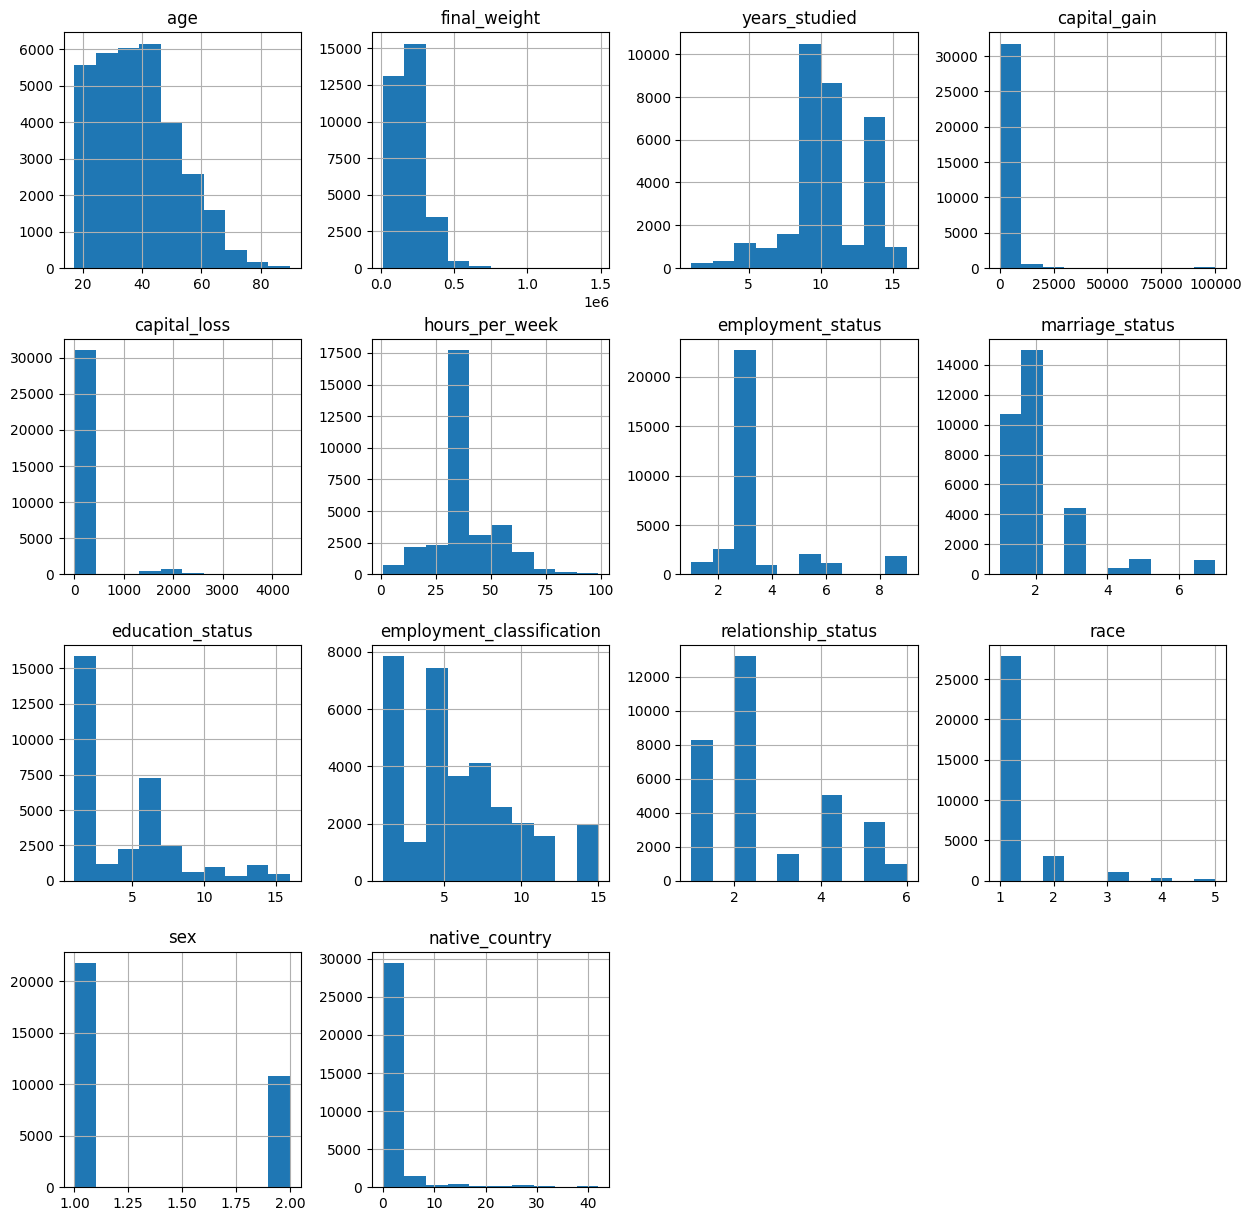

In [10]:
x_train.hist(figsize = (15, 15))

## normalizing the x-values in the dataset

In [11]:
x = x_train

x_train = (x - x.min()) / (x.max() - x.min())

x_train

,age,final_weight,years_studied,capital_gain,capital_loss,hours_per_week,employment_status,marriage_status,education_status,employment_classification,relationship_status,race,sex,native_country
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959,0.000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.023810
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,0.125,0.166667,0.000000,0.071429,0.2,0.00,0.0,0.023810
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,0.250,0.333333,0.066667,0.142857,0.0,0.00,0.0,0.023810
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,0.250,0.166667,0.133333,0.142857,0.2,0.25,0.0,0.023810
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,0.250,0.166667,0.000000,0.214286,0.4,0.25,1.0,0.047619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551,0.250,0.166667,0.400000,0.714286,0.4,0.00,1.0,0.023810
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959,0.250,0.166667,0.066667,0.642857,0.2,0.00,0.0,0.023810
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959,0.250,1.000000,0.066667,0.000000,0.8,0.00,1.0,0.023810
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878,0.250,0.000000,0.066667,0.000000,0.6,0.00,0.0,0.023810


# Feature Relevance

## Using ExtraTreesClassifier for Feature Relevance

C:\Users\Elijah Callanta\AppData\Local\Temp\ipykernel_20340\2761161509.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


[0.1575891  0.16284148 0.08993347 0.09036066 0.02899456 0.09408534
 0.04251671 0.05380405 0.03112908 0.07900338 0.10461085 0.01595776
 0.02975628 0.01941727]


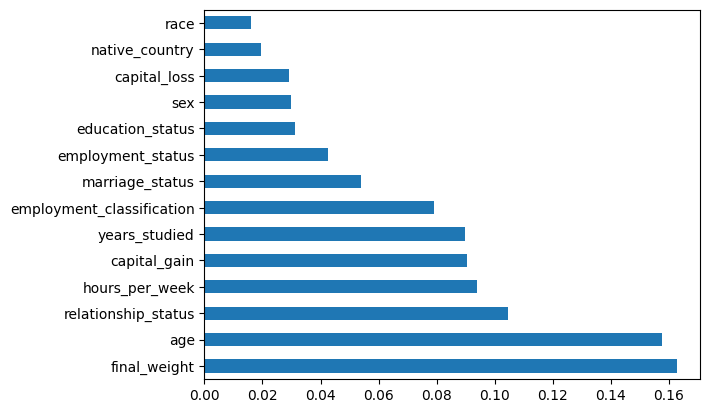

In [12]:
#Using ExtraRandomTrees Classifier for Feature Relevance and Selection
X = x_train  #independent columns
y = y_train    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

#source:https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e#:~:text=You%20can%20get%20the%20feature,feature%20towards%20your%20output%20variable.

## Getting the correlation per column and visualizing it

<AxesSubplot:>

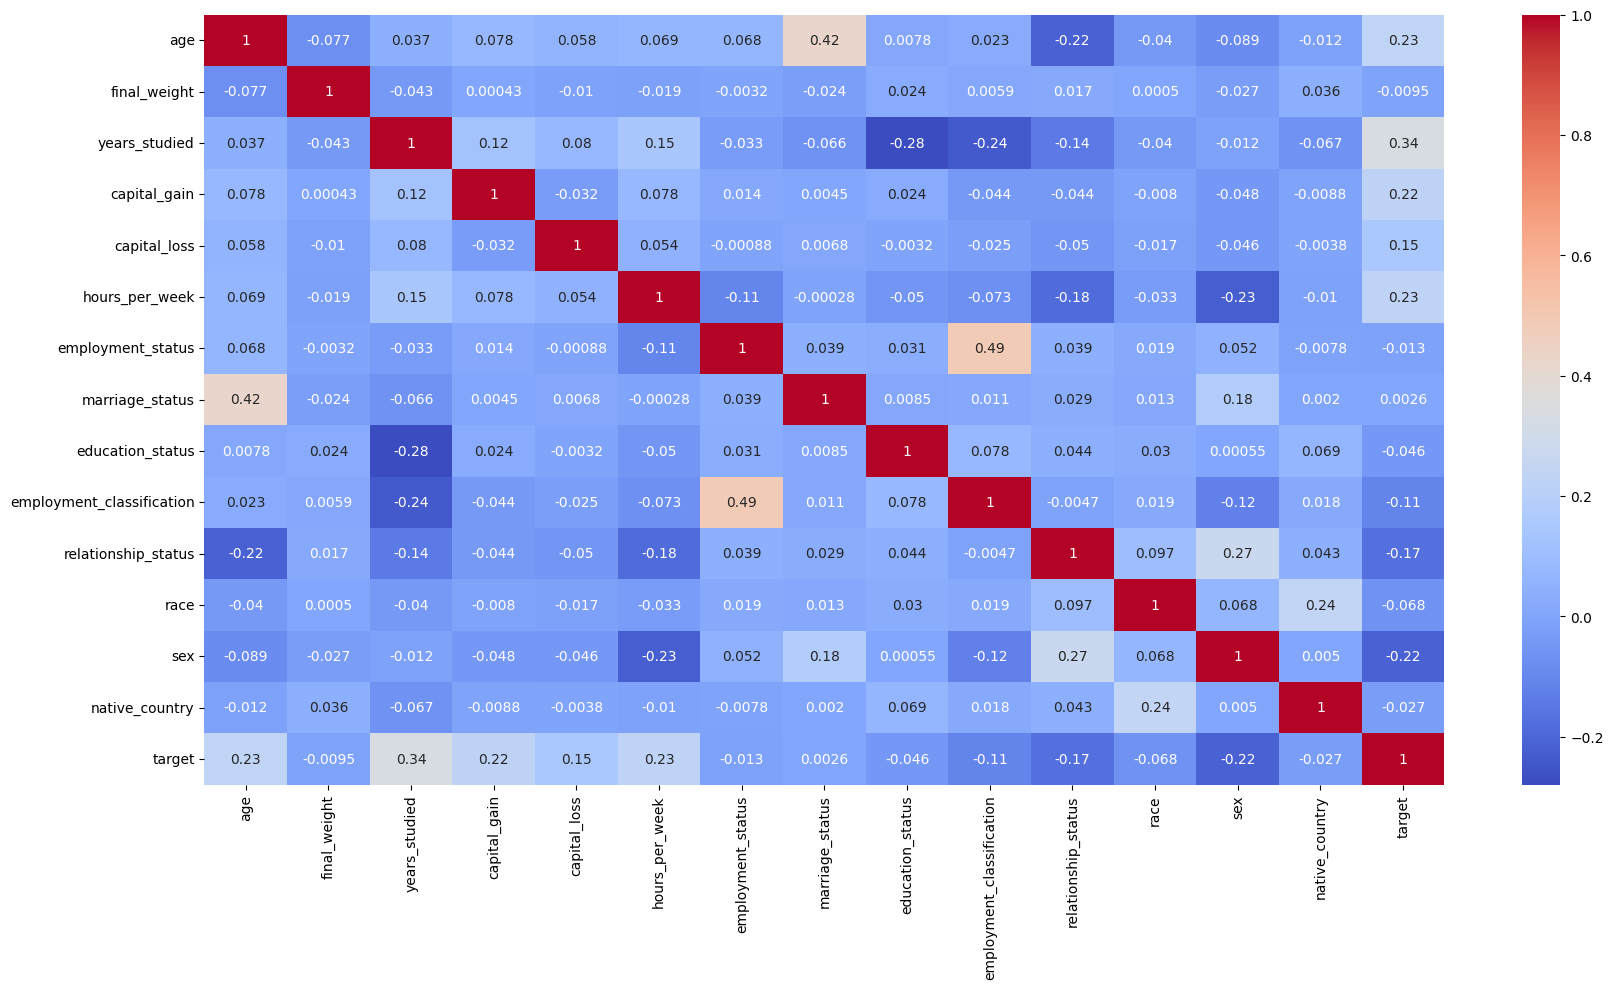

In [13]:
import seaborn as sns
df_corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(df_corr,annot=True, cmap='coolwarm')

# Building the initial model using keras

## Defining the Functional model

In [14]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

# the dataset has 14 x columns so the input shape must be set to 13
inputs = keras.Input(shape=(14,))
flatten = keras.layers.Flatten()

# the hidden layers will have 2/3 (2/3 of 32561 = 21490) the size of the input layer as per Karsoliya's paper
dense1 = keras.layers.Dense(9, activation='relu') #what does Dense mean

#the output layer will be set at 2 since there are only 2 possible targets
dense2 = keras.layers.Dense(2, activation = 'softmax', name = 'category_output')

In [15]:
x = flatten(inputs)
x = dense1(x)
outputs1 = dense2(x)

model = keras.Model(inputs=inputs, outputs=[outputs1], name='income_predictor')
model.summary()

Model: "income_predictor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14)]              0         
                                                                 
 flatten (Flatten)           (None, 14)                0         
                                                                 
 dense (Dense)               (None, 9)                 135       
                                                                 
 category_output (Dense)     (None, 2)                 20        
                                                                 
Total params: 155
Trainable params: 155
Non-trainable params: 0
_________________________________________________________________


In [16]:
#loss and optimizer
loss1 = keras.losses.SparseCategoricalCrossentropy(from_logits = False)
# loss2 = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(learning_rate = 0.001)
metrics = ['accuracy']

losses = {
    "category_output":loss1,
#     "category_output":loss2,
}

model.compile(loss=losses,optimizer=optim,metrics = metrics)

## Partitioning the dataset

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train , test_size=0.1)

In [18]:
x_train

,age,final_weight,years_studied,capital_gain,capital_loss,hours_per_week,employment_status,marriage_status,education_status,employment_classification,relationship_status,race,sex,native_country
10133,0.547945,0.055788,0.533333,0.0,0.0,0.397959,0.250,0.166667,0.066667,0.142857,0.2,0.00,0.0,0.023810
27107,0.630137,0.208389,0.400000,0.0,0.0,0.397959,1.000,0.666667,0.133333,1.000000,0.0,0.25,0.0,0.023810
4239,0.095890,0.071073,0.600000,0.0,0.0,0.448980,0.250,0.666667,0.333333,0.357143,0.8,0.00,1.0,0.023810
4280,0.178082,0.323573,0.666667,0.0,0.0,0.397959,0.250,0.166667,0.466667,0.142857,0.2,0.00,0.0,0.142857
1746,0.205479,0.329022,0.800000,0.0,0.0,0.397959,0.250,0.000000,0.000000,0.214286,0.6,0.00,0.0,0.023810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5561,0.643836,0.186392,0.200000,0.0,0.0,0.397959,1.000,1.000000,0.533333,1.000000,0.0,0.00,1.0,0.023810
27195,0.561644,0.056694,0.600000,0.0,0.0,0.602041,0.125,0.166667,0.333333,0.571429,0.2,0.00,0.0,0.023810
5220,0.369863,0.172403,0.800000,0.0,0.0,0.500000,0.250,0.166667,0.000000,0.214286,0.2,0.00,0.0,0.023810
9548,0.410959,0.027990,0.533333,0.0,0.0,0.397959,0.375,0.333333,0.066667,0.285714,0.8,0.25,1.0,0.023810


## Fitting the model to the data

In [19]:
initial_model = model.fit(x_train,
          y_train,
          epochs=10,
          verbose=1,
          shuffle=True)
# average.append(accuracy)

Epoch 1/10
916/916 [==============================] - 1s 879us/step - loss: 0.5040 - accuracy: 0.7515
Epoch 2/10
916/916 [==============================] - 1s 827us/step - loss: 0.4330 - accuracy: 0.8042
Epoch 3/10
916/916 [==============================] - 1s 931us/step - loss: 0.4116 - accuracy: 0.8160
Epoch 4/10
916/916 [==============================] - 1s 939us/step - loss: 0.3998 - accuracy: 0.8213
Epoch 5/10
916/916 [==============================] - 1s 1ms/step - loss: 0.3936 - accuracy: 0.8249
Epoch 6/10
916/916 [==============================] - 1s 850us/step - loss: 0.3907 - accuracy: 0.8257
Epoch 7/10
916/916 [==============================] - 1s 1ms/step - loss: 0.3889 - accuracy: 0.8247
Epoch 8/10
916/916 [==============================] - 1s 1ms/step - loss: 0.3885 - accuracy: 0.8256
Epoch 9/10
916/916 [==============================] - 1s 1ms/step - loss: 0.3881 - accuracy: 0.8268
Epoch 10/10
916/916 [==============================] - 1s 928us/step - loss: 0.3876 - accu

## Visualizing the loss and accuracy of the initial model

In [20]:
initial_model.history.keys()

dict_keys(['loss', 'accuracy'])

Text(0.5, 1.0, 'Loss per epoch for the initial model')

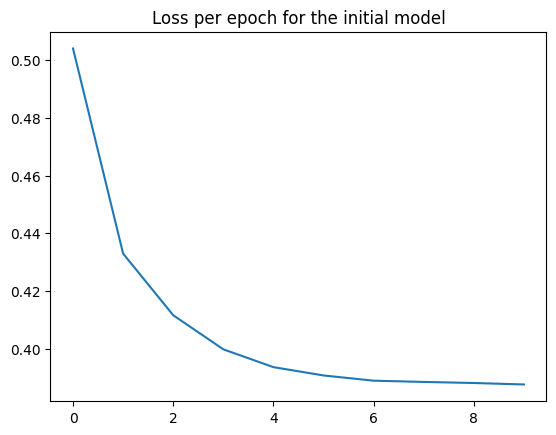

In [21]:
import matplotlib.pyplot as plt
plt.plot(initial_model.history['loss'])
plt.title("Loss per epoch for the initial model")

In [22]:
initial_model.history['loss']

[0.5040291547775269,
 0.4329618811607361,
 0.41160744428634644,
 0.3997957706451416,
 0.39362117648124695,
 0.39073801040649414,
 0.38892754912376404,
 0.38849708437919617,
 0.38812515139579773,
 0.38761448860168457]

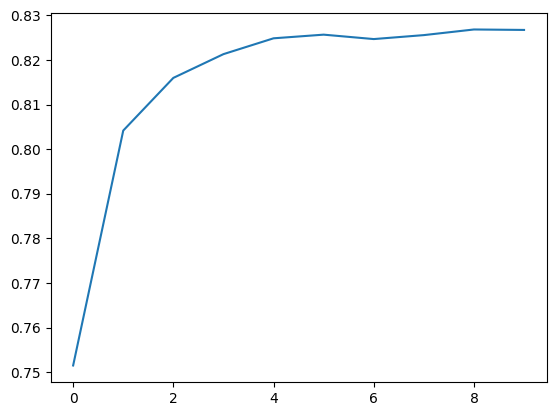

In [23]:
plt.plot(initial_model.history['accuracy'])

## Testing the model on actual test data provided

In [24]:
predictions = model.predict(x_test)
predictions_converted = np.argmax(predictions, axis = 1)
a = y_test.values.ravel()   # actual labels
b = predictions_converted   # predicted labels

correct = (a == b)
accuracy = correct.sum() / correct.size
accuracy

102/102 [==============================] - 0s 624us/step


0.8213079521031624

### Making tweaks to the data_transform function to better accomodate actual test data

In [25]:
# creating a function that transforms the non-numerical data in the dataset into integers

def data_transform(df):
    
    ### START OF transforming column 1
    
    # create a list of our conditions
    employment_status_conditions = [
        (df[1] == " State-gov"),
        (df[1] == " Self-emp-not-inc"),
        (df[1] == " Private"),
        (df[1] == " Federal-gov"),
        (df[1] == " Local-gov"),
        (df[1] == " Self-emp-inc"),
        (df[1] == " Without-pay"),
        (df[1] == " Never-worked"),
        (df[1] == " ?"),
        ]

    # create a list of the values we want to assign for each condition
    employment_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['employment_status'] = np.select(employment_status_conditions, employment_values)
    
    
    ### END OF transforming column 1
    
    ########################################################################################################################
    
    ### START OF transforming column 5
    
     # create a list of our conditions
    marriage_status_conditions = [
        (df[5] == " Never-married"),
        (df[5] == " Married-civ-spouse"),
        (df[5] == " Divorced"),
        (df[5] == " Married-spouse-absent"),
        (df[5] == " Separated"),
        (df[5] == " Married-AF-spouse"),
        (df[5] == " Widowed"),
        ]

    # create a list of the values we want to assign for each condition
    marriage_values = [1, 2, 3, 4, 5, 6, 7]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['marriage_status'] = np.select(marriage_status_conditions, marriage_values)
    
    ### END OF transforming column 5
    
    ########################################################################################################################
    
    ### START OF transforming column 3
    
     # create a list of our conditions
    education_status_conditions = [
        (df[3] == " Bachelors"),
        (df[3] == " HS-grad"),
        (df[3] == " 11th"),
        (df[3] == " Masters"),
        (df[3] == " 9th"),
        (df[3] == " Some-college"),
        (df[3] == " Assoc-acdm"),
        (df[3] == " Assoc-voc"),
        (df[3] == " 7th-8th"),
        (df[3] == " Doctorate"),
        (df[3] == " Prof-school"),
        (df[3] == " 5th-6th"),
        (df[3] == " 10th"),
        (df[3] == " 1st-4th"),
        (df[3] == " Preschool"),
        (df[3] == " 12th"),
        ]

    # create a list of the values we want to assign for each condition
    education_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['education_status'] = np.select(education_status_conditions, education_values)
    
    ### END OF transforming column 3
    
    ########################################################################################################################
    
     ### START OF transforming column 6
    
     # create a list of our conditions
    employment_classification_conditions = [
        (df[6] == " Adm-clerical"),
        (df[6] == " Exec-managerial"),
        (df[6] == " Handlers-cleaners"),
        (df[6] == " Prof-specialty"),
        (df[6] == " Other-service"),
        (df[6] == " Sales"),
        (df[6] == " Craft-repair"),
        (df[6] == " Transport-moving"),
        (df[6] == " Farming-fishing"),
        (df[6] == " Machine-op-inspct"),
        (df[6] == " Tech-support"),
        (df[6] == " Protective-serv"),
        (df[6] == " Armed-Forces"),
        (df[6] == " Priv-house-serv"),
        (df[6] == " ?"),
        ]

    # create a list of the values we want to assign for each condition
    employment_classification_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['employment_classification'] = np.select(employment_classification_conditions, employment_classification_values)
    
    ### END OF transforming column 6
    
    ########################################################################################################################
    
    ### START OF transforming column 7
    
    # create a list of our conditions
    relationship_status_conditions = [
        (df[7] == " Not-in-family"),
        (df[7] == " Husband"),
        (df[7] == " Wife"),
        (df[7] == " Own-child"),
        (df[7] == " Unmarried"),
        (df[7] == " Other-relative"),
        ]

    # create a list of the values we want to assign for each condition
    relationship_status_values = [1, 2, 3, 4, 5, 6]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['relationship_status'] = np.select(relationship_status_conditions, relationship_status_values)
    
    ### END OF transforming column 7
    
    ########################################################################################################################
    
    ### START OF transforming column 8
    
    # create a list of our conditions
    race_conditions = [
        (df[8] == " White"),
        (df[8] == " Black"),
        (df[8] == " Asian-Pac-Islander"),
        (df[8] == " Amer-Indian-Eskimo"),
        (df[8] == " Other"),
        ]

    # create a list of the values we want to assign for each condition
    race_values = [1, 2, 3, 4, 5]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['race'] = np.select(race_conditions, race_values)
    
    ### END OF transforming column 8
    
    ########################################################################################################################
    
    ### START OF transforming column 9
    
    # create a list of our conditions
    sex_conditions = [
        (df[9] == " Male"),
        (df[9] == " Female"),
        ]

    # create a list of the values we want to assign for each condition
    sex_values = [1, 2]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['sex'] = np.select(sex_conditions, sex_values)
    
    ### END OF transforming column 9
    
    ########################################################################################################################
    
    ### START OF transforming column 13
    
    # create a list of our conditions
    native_country_conditions = [
        (df[13] == " United-States"),
        (df[13] == " Cuba"),
        (df[13] == " Jamaica"),
        (df[13] == " India"),
        (df[13] == " ?"),
        (df[13] == " Mexico"),
        (df[13] == " South"),
        (df[13] == " Puerto-Rico"),
        (df[13] == " Honduras"),
        (df[13] == " England"),
        (df[13] == " Canada"),
        (df[13] == " Germany"),
        (df[13] == " Iran"),
        (df[13] == " Philippines"),
        (df[13] == " Italy"),
        (df[13] == " Poland"),
        (df[13] == " Columbia"),
        (df[13] == " Cambodia"),
        (df[13] == " Thailand"),
        (df[13] == " Ecuador"),
        (df[13] == " Laos"),
        (df[13] == " Taiwan"),
        (df[13] == " Haiti"),
        (df[13] == " Portugal"),
        (df[13] == " Dominican-Republic"),
        (df[13] == " El-Salvador"),
        (df[13] == " France"),
        (df[13] == " Guatemala"),
        (df[13] == " China"),
        (df[13] == " Japan"),
        (df[13] == " Yugoslavia"),
        (df[13] == " Peru"),
        (df[13] == " Outlying-US(Guam-USVI-etc"),
        (df[13] == " Scotland"),
        (df[13] == " Trinadad&Tobago"),
        (df[13] == " Greece"),
        (df[13] == " Nicaragua"),
        (df[13] == " Vietnam"),
        (df[13] == " Hong"),
        (df[13] == " Ireland"),
        (df[13] == " Hungary"),
        (df[13] == " Holand-Netherlands"),
        
        
        ]

    # create a list of the values we want to assign for each condition
    native_country_values = [x for x in range(1,43)]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['native_country'] = np.select(native_country_conditions, native_country_values)
    
    ### END OF transforming column 13
    
    ########################################################################################################################
    
     ### START OF transforming column 14
    
    # create a list of our conditions
    target_conditions = [
        (df[14] == " <=50K."),
        (df[14] == " >50K."),
        ]

    # create a list of the values we want to assign for each condition
    target_values = [0, 1]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['target'] = np.select(target_conditions, target_values)
    
    ### END OF transforming column 14
    
    ########################################################################################################################
    
    # START OF dropping existing redundant columns
    
    df.drop(1, inplace=True, axis=1)
    df.drop(5, inplace=True, axis=1)
    df.drop(3, inplace=True, axis=1)
    df.drop(6, inplace=True, axis=1)
    df.drop(7, inplace=True, axis=1)
    df.drop(8, inplace=True, axis=1)
    df.drop(9, inplace=True, axis=1)
    df.drop(13, inplace=True, axis=1)
    df.drop(14, inplace=True, axis=1)
    
    
    df.rename(columns={0:'age', 2:'final_weight', 4:"years_studied", 10:"capital_gain", 11: "capital_loss", 12: "hours_per_week"}, inplace=True)
    
    # END OF dropping existing redundant columns
    return df

### actual running the test_data to the new data_transform function

In [26]:
test_df = data_transform(raw_data_test)

In [27]:
test_df

,age,final_weight,years_studied,capital_gain,capital_loss,hours_per_week,employment_status,marriage_status,education_status,employment_classification,relationship_status,race,sex,native_country,target
0,25,226802,7,0,0,40,3,1,3,10,4,2,1,1,0
1,38,89814,9,0,0,50,3,2,2,9,2,1,1,1,0
2,28,336951,12,0,0,40,5,2,7,12,2,1,1,1,1
3,44,160323,10,7688,0,40,3,2,6,10,2,2,1,1,1
4,18,103497,10,0,0,30,9,1,6,15,4,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,215419,13,0,0,36,3,3,1,4,1,1,2,1,0
16277,64,321403,9,0,0,40,9,7,2,15,6,2,1,1,0
16278,38,374983,13,0,0,50,3,2,1,4,2,1,1,1,0
16279,44,83891,13,5455,0,40,3,3,1,1,4,3,1,1,0


### separating x_test and y_test column

In [28]:
x_test = test_df.iloc[:,0:14]
x_test

,age,final_weight,years_studied,capital_gain,capital_loss,hours_per_week,employment_status,marriage_status,education_status,employment_classification,relationship_status,race,sex,native_country
0,25,226802,7,0,0,40,3,1,3,10,4,2,1,1
1,38,89814,9,0,0,50,3,2,2,9,2,1,1,1
2,28,336951,12,0,0,40,5,2,7,12,2,1,1,1
3,44,160323,10,7688,0,40,3,2,6,10,2,2,1,1
4,18,103497,10,0,0,30,9,1,6,15,4,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,215419,13,0,0,36,3,3,1,4,1,1,2,1
16277,64,321403,9,0,0,40,9,7,2,15,6,2,1,1
16278,38,374983,13,0,0,50,3,2,1,4,2,1,1,1
16279,44,83891,13,5455,0,40,3,3,1,1,4,3,1,1


In [29]:
y_test = test_df.iloc[:,[14]]
y_test

,target
0,0
1,0
2,1
3,1
4,0
...,...
16276,0
16277,0
16278,0
16279,0


#### normalizing x_test values

In [30]:
x = x_test
x_test = (x - x.min()) / (x.max() - x.min())
x_test

,age,final_weight,years_studied,capital_gain,capital_loss,hours_per_week,employment_status,marriage_status,education_status,employment_classification,relationship_status,race,sex,native_country
0,0.109589,0.144430,0.400000,0.000000,0.0,0.397959,0.250,0.000000,0.133333,0.642857,0.6,0.25,0.0,0.02439
1,0.287671,0.051677,0.533333,0.000000,0.0,0.500000,0.250,0.166667,0.066667,0.571429,0.2,0.00,0.0,0.02439
2,0.150685,0.219011,0.733333,0.000000,0.0,0.397959,0.500,0.166667,0.400000,0.785714,0.2,0.00,0.0,0.02439
3,0.369863,0.099418,0.600000,0.076881,0.0,0.397959,0.250,0.166667,0.333333,0.642857,0.2,0.25,0.0,0.02439
4,0.013699,0.060942,0.600000,0.000000,0.0,0.295918,1.000,0.000000,0.333333,1.000000,0.6,0.00,1.0,0.02439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.301370,0.136723,0.800000,0.000000,0.0,0.357143,0.250,0.333333,0.000000,0.214286,0.0,0.00,1.0,0.02439
16277,0.643836,0.208484,0.533333,0.000000,0.0,0.397959,1.000,1.000000,0.066667,1.000000,1.0,0.25,0.0,0.02439
16278,0.287671,0.244762,0.800000,0.000000,0.0,0.500000,0.250,0.166667,0.000000,0.214286,0.2,0.00,0.0,0.02439
16279,0.369863,0.047666,0.800000,0.054551,0.0,0.397959,0.250,0.333333,0.000000,0.000000,0.6,0.50,0.0,0.02439


### Running the x_test values through the model and comparing the predictions to the actual y_test values

In [31]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis = 1)
predictions

509/509 [==============================] - 0s 582us/step


array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [32]:
a = y_test.values.ravel()   # actual labels
b = predictions   # predicted labels

correct = (a == b)
accuracy = correct.sum() / correct.size
print(accuracy)

0.823536637798661


# [EXPERIMENT] Variations in the number of neurons for a single hidden layer

## Building the models to be used: neuron_model_onethird, neuron_model_twothird, neuron_model_one, neuron_model_fourthird

### building neuron_model_onethird

In [33]:
# the dataset has 14 x columns so the input shape must be set to 13
inputs = keras.Input(shape=(14,))
flatten = keras.layers.Flatten()

# since this is neuron_model_onethird, the number of neurons in the hidden layer will be 1/3 of 32561
dense1 = keras.layers.Dense(2, activation='relu') #what does Dense mean

#the output layer will be set at 2 since there are only 2 possible targets
dense2 = keras.layers.Dense(2, activation = 'softmax', name = 'category_output')

x = flatten(inputs)
x = dense1(x)
outputs1 = dense2(x)

neuron_model_onethird = keras.Model(inputs=inputs, outputs=[outputs1], name='neuron_model_onethird')

loss1 = keras.losses.SparseCategoricalCrossentropy(from_logits = False)
# loss2 = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(learning_rate = 0.001)
metrics = ['accuracy']

losses = {
    "category_output":loss1,
#     "category_output":loss2,
}

neuron_model_onethird.compile(loss=losses,optimizer=optim,metrics = metrics)
neuron_model_onethird.summary()

Model: "neuron_model_onethird"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 14)]              0         
                                                                 
 flatten_1 (Flatten)         (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 30        
                                                                 
 category_output (Dense)     (None, 2)                 6         
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


### building neuron_model_twothird

In [34]:
# the dataset has 14 x columns so the input shape must be set to 13
inputs = keras.Input(shape=(14,))
flatten = keras.layers.Flatten()

# since this is neuron_model_twothird, the number of neurons in the hidden layer will be 2/3 of 32561
dense1 = keras.layers.Dense(4, activation='relu') #what does Dense mean

#the output layer will be set at 2 since there are only 2 possible targets
dense2 = keras.layers.Dense(2, activation = 'softmax', name = 'category_output')

x = flatten(inputs)
x = dense1(x)
outputs1 = dense2(x)

neuron_model_twothird = keras.Model(inputs=inputs, outputs=[outputs1], name='neuron_model_twothird')

loss1 = keras.losses.SparseCategoricalCrossentropy(from_logits = False)
# loss2 = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(learning_rate = 0.001)
metrics = ['accuracy']

losses = {
    "category_output":loss1,
#     "category_output":loss2,
}

neuron_model_twothird.compile(loss=losses,optimizer=optim,metrics = metrics)
neuron_model_twothird.summary()

Model: "neuron_model_twothird"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 14)]              0         
                                                                 
 flatten_2 (Flatten)         (None, 14)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 60        
                                                                 
 category_output (Dense)     (None, 2)                 10        
                                                                 
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________


### building neuron_model_one

In [35]:
# the dataset has 14 x columns so the input shape must be set to 13
inputs = keras.Input(shape=(14,))
flatten = keras.layers.Flatten()

# since this is neuron_model_one, the number of neurons in the hidden layer will be 32561
dense1 = keras.layers.Dense(9, activation='relu') #what does Dense mean

#the output layer will be set at 2 since there are only 2 possible targets
dense2 = keras.layers.Dense(2, activation = 'softmax', name = 'category_output')

x = flatten(inputs)
x = dense1(x)
outputs1 = dense2(x)

neuron_model_one = keras.Model(inputs=inputs, outputs=[outputs1], name='neuron_model_one')

loss1 = keras.losses.SparseCategoricalCrossentropy(from_logits = False)
# loss2 = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(learning_rate = 0.001)
metrics = ['accuracy']

losses = {
    "category_output":loss1,
#     "category_output":loss2,
}

neuron_model_one.compile(loss=losses,optimizer=optim,metrics = metrics)
neuron_model_one.summary()

Model: "neuron_model_one"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 14)]              0         
                                                                 
 flatten_3 (Flatten)         (None, 14)                0         
                                                                 
 dense_3 (Dense)             (None, 9)                 135       
                                                                 
 category_output (Dense)     (None, 2)                 20        
                                                                 
Total params: 155
Trainable params: 155
Non-trainable params: 0
_________________________________________________________________


### building neuron_model_fourthird

In [36]:
# the dataset has 14 x columns so the input shape must be set to 13
inputs = keras.Input(shape=(14,))
flatten = keras.layers.Flatten()

# since this is neuron_model_fourthird, the number of neurons in the hidden layer will be 4/3 of 32561
dense1 = keras.layers.Dense(14, activation='relu') #what does Dense mean

#the output layer will be set at 2 since there are only 2 possible targets
dense2 = keras.layers.Dense(2, activation = 'softmax', name = 'category_output')

x = flatten(inputs)
x = dense1(x)
outputs1 = dense2(x)

neuron_model_fourthird = keras.Model(inputs=inputs, outputs=[outputs1], name='neuron_model_fourthird')

loss1 = keras.losses.SparseCategoricalCrossentropy(from_logits = False)
# loss2 = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(learning_rate = 0.001)
metrics = ['accuracy']

losses = {
    "category_output":loss1,
#     "category_output":loss2,
}

neuron_model_fourthird.compile(loss=losses,optimizer=optim,metrics = metrics)
neuron_model_fourthird.summary()

Model: "neuron_model_fourthird"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 14)]              0         
                                                                 
 flatten_4 (Flatten)         (None, 14)                0         
                                                                 
 dense_4 (Dense)             (None, 14)                210       
                                                                 
 category_output (Dense)     (None, 2)                 30        
                                                                 
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


## Fitting each model to the training data and recording the loss and accuracy in a dataframe

In [37]:
from timeit import default_timer as timer


class TimingCallback(keras.callbacks.Callback):

    def __init__(self, logs={}):
        self.logs = []

    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()

    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer() - self.starttime)


cb = TimingCallback()

neuron_models = [
    neuron_model_onethird, neuron_model_twothird, neuron_model_one,
    neuron_model_fourthird
]
losses = []
accuracies = []
predictions = []
training_times = []
for model in neuron_models:
    test_model = model.fit(x_train,
                           y_train,
                           epochs=100,
                           verbose=1,
                           shuffle=True,
                           callbacks=[cb])

    prediction = model.predict(x_test)
    prediction = np.argmax(prediction, axis=1)
    predictions.append(prediction)
    losses.append(test_model.history["loss"])
    accuracies.append(test_model.history["accuracy"])
    training_times.append(sum(cb.logs))

Epoch 1/100
916/916 [==============================] - 1s 878us/step - loss: 0.5969 - accuracy: 0.7311
Epoch 2/100
916/916 [==============================] - 1s 769us/step - loss: 0.5520 - accuracy: 0.7597
Epoch 3/100
916/916 [==============================] - 1s 825us/step - loss: 0.5513 - accuracy: 0.7597
Epoch 4/100
916/916 [==============================] - 1s 771us/step - loss: 0.5404 - accuracy: 0.7618
Epoch 5/100
916/916 [==============================] - 1s 751us/step - loss: 0.4595 - accuracy: 0.7911
Epoch 6/100
916/916 [==============================] - 1s 788us/step - loss: 0.4247 - accuracy: 0.8109
Epoch 7/100
916/916 [==============================] - 1s 765us/step - loss: 0.4102 - accuracy: 0.8175
Epoch 8/100
916/916 [==============================] - 1s 764us/step - loss: 0.4024 - accuracy: 0.8212
Epoch 9/100
916/916 [==============================] - 1s 863us/step - loss: 0.3978 - accuracy: 0.8228
Epoch 10/100
916/916 [==============================] - 1s 779us/step - l

916/916 [==============================] - 1s 781us/step - loss: 0.3885 - accuracy: 0.8265
Epoch 80/100
916/916 [==============================] - 1s 748us/step - loss: 0.3885 - accuracy: 0.8268
Epoch 81/100
916/916 [==============================] - 1s 753us/step - loss: 0.3884 - accuracy: 0.8262
Epoch 82/100
916/916 [==============================] - 1s 742us/step - loss: 0.3886 - accuracy: 0.8269
Epoch 83/100
916/916 [==============================] - 1s 755us/step - loss: 0.3884 - accuracy: 0.8260
Epoch 84/100
916/916 [==============================] - 1s 748us/step - loss: 0.3885 - accuracy: 0.8272
Epoch 85/100
916/916 [==============================] - 1s 747us/step - loss: 0.3884 - accuracy: 0.8259
Epoch 86/100
916/916 [==============================] - 1s 794us/step - loss: 0.3884 - accuracy: 0.8272
Epoch 87/100
916/916 [==============================] - 1s 753us/step - loss: 0.3883 - accuracy: 0.8260
Epoch 88/100
916/916 [==============================] - 1s 752us/step - loss:

916/916 [==============================] - 1s 744us/step - loss: 0.3370 - accuracy: 0.8439
Epoch 58/100
916/916 [==============================] - 1s 754us/step - loss: 0.3369 - accuracy: 0.8439
Epoch 59/100
916/916 [==============================] - 1s 746us/step - loss: 0.3368 - accuracy: 0.8438
Epoch 60/100
916/916 [==============================] - 1s 756us/step - loss: 0.3368 - accuracy: 0.8439
Epoch 61/100
916/916 [==============================] - 1s 746us/step - loss: 0.3368 - accuracy: 0.8445
Epoch 62/100
916/916 [==============================] - 1s 739us/step - loss: 0.3366 - accuracy: 0.8438
Epoch 63/100
916/916 [==============================] - 1s 750us/step - loss: 0.3366 - accuracy: 0.8436
Epoch 64/100
916/916 [==============================] - 1s 751us/step - loss: 0.3364 - accuracy: 0.8438
Epoch 65/100
916/916 [==============================] - 1s 757us/step - loss: 0.3365 - accuracy: 0.8431
Epoch 66/100
916/916 [==============================] - 1s 758us/step - loss:

916/916 [==============================] - 1s 783us/step - loss: 0.3249 - accuracy: 0.8485
Epoch 36/100
916/916 [==============================] - 1s 799us/step - loss: 0.3251 - accuracy: 0.8484
Epoch 37/100
916/916 [==============================] - 1s 791us/step - loss: 0.3248 - accuracy: 0.8484
Epoch 38/100
916/916 [==============================] - 1s 788us/step - loss: 0.3251 - accuracy: 0.8488
Epoch 39/100
916/916 [==============================] - 1s 794us/step - loss: 0.3249 - accuracy: 0.8491
Epoch 40/100
916/916 [==============================] - 1s 783us/step - loss: 0.3246 - accuracy: 0.8492
Epoch 41/100
916/916 [==============================] - 1s 784us/step - loss: 0.3246 - accuracy: 0.8491
Epoch 42/100
916/916 [==============================] - 1s 789us/step - loss: 0.3246 - accuracy: 0.8493
Epoch 43/100
916/916 [==============================] - 1s 799us/step - loss: 0.3245 - accuracy: 0.8497
Epoch 44/100
916/916 [==============================] - 1s 787us/step - loss:

916/916 [==============================] - 1s 752us/step - loss: 0.3600 - accuracy: 0.8358
Epoch 11/100
916/916 [==============================] - 1s 754us/step - loss: 0.3526 - accuracy: 0.8387
Epoch 12/100
916/916 [==============================] - 1s 746us/step - loss: 0.3475 - accuracy: 0.8385
Epoch 13/100
916/916 [==============================] - 1s 749us/step - loss: 0.3444 - accuracy: 0.8414
Epoch 14/100
916/916 [==============================] - 1s 748us/step - loss: 0.3420 - accuracy: 0.8425
Epoch 15/100
916/916 [==============================] - 1s 757us/step - loss: 0.3406 - accuracy: 0.8425
Epoch 16/100
916/916 [==============================] - 1s 755us/step - loss: 0.3397 - accuracy: 0.8431
Epoch 17/100
916/916 [==============================] - 1s 747us/step - loss: 0.3391 - accuracy: 0.8434
Epoch 18/100
916/916 [==============================] - 1s 751us/step - loss: 0.3388 - accuracy: 0.8433
Epoch 19/100
916/916 [==============================] - 1s 776us/step - loss:

916/916 [==============================] - 1s 740us/step - loss: 0.3351 - accuracy: 0.8440
Epoch 89/100
916/916 [==============================] - 1s 754us/step - loss: 0.3353 - accuracy: 0.8449
Epoch 90/100
916/916 [==============================] - 1s 746us/step - loss: 0.3357 - accuracy: 0.8443
Epoch 91/100
916/916 [==============================] - 1s 744us/step - loss: 0.3354 - accuracy: 0.8447
Epoch 92/100
916/916 [==============================] - 1s 765us/step - loss: 0.3352 - accuracy: 0.8451
Epoch 93/100
916/916 [==============================] - 1s 752us/step - loss: 0.3355 - accuracy: 0.8438
Epoch 94/100
916/916 [==============================] - 1s 755us/step - loss: 0.3352 - accuracy: 0.8445
Epoch 95/100
916/916 [==============================] - 1s 756us/step - loss: 0.3352 - accuracy: 0.8447
Epoch 96/100
916/916 [==============================] - 1s 765us/step - loss: 0.3354 - accuracy: 0.8448
Epoch 97/100
916/916 [==============================] - 1s 771us/step - loss:

## Putting the recorded accuracies and losses into a dataframe

In [38]:
neuron_model_losses_results = {
    "neuron_model_onethird":losses[0],
    "neuron_model_twothird":losses[1],
    "neuron_model_one":losses[2],
    "neuron_model_fourthird":losses[3],
}
neuron_model_accuracies_results = {
    "neuron_model_onethird":accuracies[0],
    "neuron_model_twothird":accuracies[1],
    "neuron_model_one":accuracies[2],
    "neuron_model_fourthird":accuracies[3],
}

In [39]:
neuron_model_losses_results = pd.DataFrame.from_dict(neuron_model_losses_results)
neuron_model_accuracies_results = pd.DataFrame.from_dict(neuron_model_accuracies_results)
index = [x for x in range(0,100)]#change this range to 100 later

## Visualizing the data generated

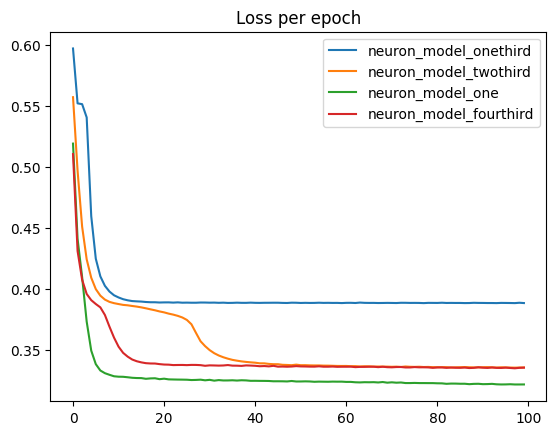

In [40]:
plt.plot(index, neuron_model_losses_results["neuron_model_onethird"], label = "neuron_model_onethird")
plt.plot(index, neuron_model_losses_results["neuron_model_twothird"], label = "neuron_model_twothird")
plt.plot(index, neuron_model_losses_results["neuron_model_one"], label = "neuron_model_one")
plt.plot(index, neuron_model_losses_results["neuron_model_fourthird"], label = "neuron_model_fourthird")
plt.title("Loss per epoch")
plt.legend()
plt.show()

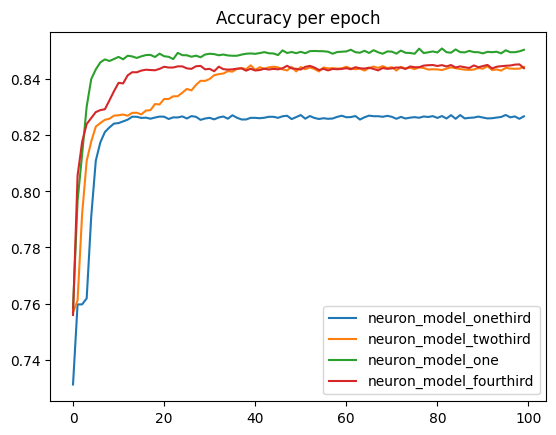

In [41]:
plt.plot(index, neuron_model_accuracies_results["neuron_model_onethird"], label = "neuron_model_onethird")
plt.plot(index, neuron_model_accuracies_results["neuron_model_twothird"], label = "neuron_model_twothird")
plt.plot(index, neuron_model_accuracies_results["neuron_model_one"], label = "neuron_model_one")
plt.plot(index, neuron_model_accuracies_results["neuron_model_fourthird"], label = "neuron_model_fourthird")
plt.title("Accuracy per epoch")
plt.legend()
plt.show()

## Getting the average loss and accuracy per model

In [42]:
print(neuron_model_losses_results["neuron_model_onethird"].mean())
print(neuron_model_losses_results["neuron_model_twothird"].mean())
print(neuron_model_losses_results["neuron_model_one"].mean())
print(neuron_model_losses_results["neuron_model_fourthird"].mean())

0.39710551738739014
0.3548652741312981
0.3291452890634537
0.34335694402456285


In [43]:
print(neuron_model_accuracies_results["neuron_model_onethird"].mean())
print(neuron_model_accuracies_results["neuron_model_twothird"].mean())
print(neuron_model_accuracies_results["neuron_model_one"].mean())
print(neuron_model_accuracies_results["neuron_model_fourthird"].mean())

0.8227177184820175
0.8376515161991119
0.8470481860637665
0.84133087515831


In [44]:
accuracy_mean = []
accuracy_mean.append(neuron_model_accuracies_results["neuron_model_onethird"].mean())
accuracy_mean.append(neuron_model_accuracies_results["neuron_model_twothird"].mean())
accuracy_mean.append(neuron_model_accuracies_results["neuron_model_one"].mean())
accuracy_mean.append(neuron_model_accuracies_results["neuron_model_fourthird"].mean())
accuracy_mean

[0.8227177184820175, 0.8376515161991119, 0.8470481860637665, 0.84133087515831]

In [45]:
neuron_model_names = ["neuron_model_2", "neuron_model_4","neuron_model_9","neuron_model_14" ]

In [46]:
test_accuracies = []

In [47]:
for prediction in predictions:
    a = y_test.values.ravel()   # actual labels
    b = prediction   # predicted labels

    correct = (a == b)
    accuracy = correct.sum() / correct.size
    test_accuracies.append(accuracy)

## Visualizing the accuracy of each model when tested against actual test data

In [48]:
print(training_times)

[71.64449160000002, 141.04036779999993, 213.50496460000005, 282.92718019999995]


[0.8234752165100424, 0.8431914501566243, 0.8502548983477674, 0.8447269823720902]


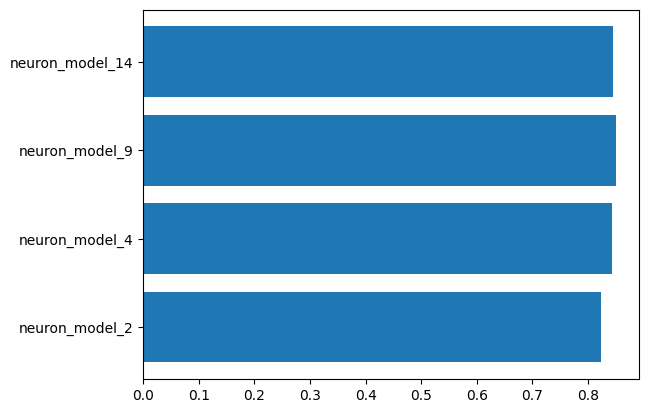

In [49]:
plt.barh(neuron_model_names, test_accuracies)
print(test_accuracies)
# Display the plot
plt.show()

# [EXPERIMENT] Variations in the number of layers for a set amount of neurons

## building the models to be used layer_model_1, 2, 3, 4, and 5

In [50]:
# given that 2/3 of 14 performed the best in neurons, we will be putting 9 neurons per layer

### layer_model_1

In [51]:
# the dataset has 14 x columns so the input shape must be set to 13
inputs = keras.Input(shape=(14,))
flatten = keras.layers.Flatten()

# since this is neuron_model_twothird, the number of neurons in the hidden layer will be 2/3 of 32561
dense1 = keras.layers.Dense(9, activation='relu') #what does Dense mean

#the output layer will be set at 2 since there are only 2 possible targets
dense2 = keras.layers.Dense(2, activation = 'softmax', name = 'category_output')

x = flatten(inputs)
x = dense1(x)
outputs1 = dense2(x)

layer_model_1 = keras.Model(inputs=inputs, outputs=[outputs1], name='layer_model_1')

loss1 = keras.losses.SparseCategoricalCrossentropy(from_logits = False)
# loss2 = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(learning_rate = 0.001)
metrics = ['accuracy']

losses = {
    "category_output":loss1,
#     "category_output":loss2,
}

layer_model_1.compile(loss=losses,optimizer=optim,metrics = metrics)
layer_model_1.summary()

Model: "layer_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 14)]              0         
                                                                 
 flatten_5 (Flatten)         (None, 14)                0         
                                                                 
 dense_5 (Dense)             (None, 9)                 135       
                                                                 
 category_output (Dense)     (None, 2)                 20        
                                                                 
Total params: 155
Trainable params: 155
Non-trainable params: 0
_________________________________________________________________


### layer_model_2

In [52]:
# the dataset has 14 x columns so the input shape must be set to 13
inputs = keras.Input(shape=(14,))
flatten = keras.layers.Flatten()

# since this is neuron_model_twothird, the number of neurons in the hidden layer will be 2/3 of 32561
dense1 = keras.layers.Dense(9, activation='relu') #what does Dense mean
dense3 = keras.layers.Dense(9, activation='relu')

#the output layer will be set at 2 since there are only 2 possible targets
dense2 = keras.layers.Dense(2, activation = 'softmax', name = 'category_output')

x = flatten(inputs)
x = dense1(x)
x = dense3(x)
outputs1 = dense2(x)

layer_model_2 = keras.Model(inputs=inputs, outputs=[outputs1], name='layer_model_2')

loss1 = keras.losses.SparseCategoricalCrossentropy(from_logits = False)
# loss2 = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(learning_rate = 0.001)
metrics = ['accuracy']

losses = {
    "category_output":loss1,
#     "category_output":loss2,
}

layer_model_2.compile(loss=losses,optimizer=optim,metrics = metrics)
layer_model_2.summary()

Model: "layer_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 14)]              0         
                                                                 
 flatten_6 (Flatten)         (None, 14)                0         
                                                                 
 dense_6 (Dense)             (None, 9)                 135       
                                                                 
 dense_7 (Dense)             (None, 9)                 90        
                                                                 
 category_output (Dense)     (None, 2)                 20        
                                                                 
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


### layer_model 3

In [53]:
# the dataset has 14 x columns so the input shape must be set to 13
inputs = keras.Input(shape=(14,))
flatten = keras.layers.Flatten()

# since this is neuron_model_twothird, the number of neurons in the hidden layer will be 2/3 of 32561
dense1 = keras.layers.Dense(9, activation='relu') #what does Dense mean
dense3 = keras.layers.Dense(9, activation='relu')
dense4 = keras.layers.Dense(9, activation='relu')

#the output layer will be set at 2 since there are only 2 possible targets
dense2 = keras.layers.Dense(2, activation = 'softmax', name = 'category_output')

x = flatten(inputs)
x = dense1(x)
x = dense3(x)
x = dense4(x)
outputs1 = dense2(x)

layer_model_3 = keras.Model(inputs=inputs, outputs=[outputs1], name='layer_model_3')

loss1 = keras.losses.SparseCategoricalCrossentropy(from_logits = False)
# loss2 = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(learning_rate = 0.001)
metrics = ['accuracy']

losses = {
    "category_output":loss1,
#     "category_output":loss2,
}

layer_model_3.compile(loss=losses,optimizer=optim,metrics = metrics)
layer_model_3.summary()

Model: "layer_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 14)]              0         
                                                                 
 flatten_7 (Flatten)         (None, 14)                0         
                                                                 
 dense_8 (Dense)             (None, 9)                 135       
                                                                 
 dense_9 (Dense)             (None, 9)                 90        
                                                                 
 dense_10 (Dense)            (None, 9)                 90        
                                                                 
 category_output (Dense)     (None, 2)                 20        
                                                                 
Total params: 335
Trainable params: 335
Non-trainable

### layer_model_4

In [54]:
# the dataset has 14 x columns so the input shape must be set to 13
inputs = keras.Input(shape=(14,))
flatten = keras.layers.Flatten()

# since this is neuron_model_twothird, the number of neurons in the hidden layer will be 2/3 of 32561
dense1 = keras.layers.Dense(9, activation='relu') #what does Dense mean
dense3 = keras.layers.Dense(9, activation='relu')
dense4 = keras.layers.Dense(9, activation='relu')
dense5 = keras.layers.Dense(9, activation='relu')

#the output layer will be set at 2 since there are only 2 possible targets
dense2 = keras.layers.Dense(2, activation = 'softmax', name = 'category_output')

x = flatten(inputs)
x = dense1(x)
x = dense3(x)
x = dense4(x)
x = dense5(x)
outputs1 = dense2(x)

layer_model_4 = keras.Model(inputs=inputs, outputs=[outputs1], name='layer_model_4')

loss1 = keras.losses.SparseCategoricalCrossentropy(from_logits = False)
# loss2 = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(learning_rate = 0.001)
metrics = ['accuracy']

losses = {
    "category_output":loss1,
#     "category_output":loss2,
}

layer_model_4.compile(loss=losses,optimizer=optim,metrics = metrics)
layer_model_4.summary()

Model: "layer_model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 14)]              0         
                                                                 
 flatten_8 (Flatten)         (None, 14)                0         
                                                                 
 dense_11 (Dense)            (None, 9)                 135       
                                                                 
 dense_12 (Dense)            (None, 9)                 90        
                                                                 
 dense_13 (Dense)            (None, 9)                 90        
                                                                 
 dense_14 (Dense)            (None, 9)                 90        
                                                                 
 category_output (Dense)     (None, 2)               

### layer_model_5

In [55]:
# the dataset has 14 x columns so the input shape must be set to 13
inputs = keras.Input(shape=(14,))
flatten = keras.layers.Flatten()

# since this is neuron_model_twothird, the number of neurons in the hidden layer will be 2/3 of 32561
dense1 = keras.layers.Dense(9, activation='relu') #what does Dense mean
dense3 = keras.layers.Dense(9, activation='relu')
dense4 = keras.layers.Dense(9, activation='relu')
dense5 = keras.layers.Dense(9, activation='relu')
dense6 = keras.layers.Dense(9, activation='relu')

#the output layer will be set at 2 since there are only 2 possible targets
dense2 = keras.layers.Dense(2, activation = 'softmax', name = 'category_output')

x = flatten(inputs)
x = dense1(x)
x = dense3(x)
x = dense4(x)
x = dense5(x)
x = dense6(x)
outputs1 = dense2(x)

layer_model_5 = keras.Model(inputs=inputs, outputs=[outputs1], name='layer_model_5')

loss1 = keras.losses.SparseCategoricalCrossentropy(from_logits = False)
# loss2 = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(learning_rate = 0.001)
metrics = ['accuracy']

losses = {
    "category_output":loss1,
#     "category_output":loss2,
}

layer_model_5.compile(loss=losses,optimizer=optim,metrics = metrics)
layer_model_5.summary()

Model: "layer_model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 14)]              0         
                                                                 
 flatten_9 (Flatten)         (None, 14)                0         
                                                                 
 dense_15 (Dense)            (None, 9)                 135       
                                                                 
 dense_16 (Dense)            (None, 9)                 90        
                                                                 
 dense_17 (Dense)            (None, 9)                 90        
                                                                 
 dense_18 (Dense)            (None, 9)                 90        
                                                                 
 dense_19 (Dense)            (None, 9)               

## Fitting the data to the models and recording loss and accuracies

In [56]:
from timeit import default_timer as timer


class TimingCallback(keras.callbacks.Callback):

    def __init__(self, logs={}):
        self.logs = []

    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()

    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer() - self.starttime)


cb = TimingCallback()

layer_models = [
    layer_model_1, layer_model_2, layer_model_3, layer_model_4, layer_model_5
]
losses = []
accuracies = []
predictions = []
training_times = []
for model in layer_models:
    test_model = model.fit(x_train,
                           y_train,
                           epochs=100,
                           verbose=1,
                           shuffle=True,
                           callbacks=[cb])

    prediction = model.predict(x_test)
    prediction = np.argmax(prediction, axis=1)
    predictions.append(prediction)
    losses.append(test_model.history["loss"])
    accuracies.append(test_model.history["accuracy"])
#     print(cb.logs)
    training_times.append(sum(cb.logs))

Epoch 1/100
916/916 [==============================] - 1s 793us/step - loss: 0.5025 - accuracy: 0.7672
Epoch 2/100
916/916 [==============================] - 1s 785us/step - loss: 0.4307 - accuracy: 0.8026
Epoch 3/100
916/916 [==============================] - 1s 780us/step - loss: 0.4000 - accuracy: 0.8208
Epoch 4/100
916/916 [==============================] - 1s 802us/step - loss: 0.3767 - accuracy: 0.8308
Epoch 5/100
916/916 [==============================] - 1s 787us/step - loss: 0.3612 - accuracy: 0.8362
Epoch 6/100
916/916 [==============================] - 1s 781us/step - loss: 0.3520 - accuracy: 0.8385
Epoch 7/100
916/916 [==============================] - 1s 783us/step - loss: 0.3468 - accuracy: 0.8402
Epoch 8/100
916/916 [==============================] - 1s 782us/step - loss: 0.3441 - accuracy: 0.8425
Epoch 9/100
916/916 [==============================] - 1s 790us/step - loss: 0.3425 - accuracy: 0.8423
Epoch 10/100
916/916 [==============================] - 1s 790us/step - l

916/916 [==============================] - 1s 790us/step - loss: 0.3278 - accuracy: 0.8462
Epoch 78/100
916/916 [==============================] - 1s 778us/step - loss: 0.3277 - accuracy: 0.8477
Epoch 79/100
916/916 [==============================] - 1s 748us/step - loss: 0.3277 - accuracy: 0.8469
Epoch 80/100
916/916 [==============================] - 1s 780us/step - loss: 0.3276 - accuracy: 0.8468
Epoch 81/100
916/916 [==============================] - 1s 781us/step - loss: 0.3273 - accuracy: 0.8466
Epoch 82/100
916/916 [==============================] - 1s 790us/step - loss: 0.3276 - accuracy: 0.8471
Epoch 83/100
916/916 [==============================] - 1s 807us/step - loss: 0.3270 - accuracy: 0.8478
Epoch 84/100
916/916 [==============================] - 1s 791us/step - loss: 0.3277 - accuracy: 0.8468
Epoch 85/100
916/916 [==============================] - 1s 788us/step - loss: 0.3272 - accuracy: 0.8459
Epoch 86/100
916/916 [==============================] - 1s 791us/step - loss:

916/916 [==============================] - 1s 803us/step - loss: 0.3179 - accuracy: 0.8501
Epoch 56/100
916/916 [==============================] - 1s 804us/step - loss: 0.3171 - accuracy: 0.8498
Epoch 57/100
916/916 [==============================] - 1s 791us/step - loss: 0.3169 - accuracy: 0.8516
Epoch 58/100
916/916 [==============================] - 1s 806us/step - loss: 0.3170 - accuracy: 0.8508
Epoch 59/100
916/916 [==============================] - 1s 801us/step - loss: 0.3173 - accuracy: 0.8512
Epoch 60/100
916/916 [==============================] - 1s 805us/step - loss: 0.3169 - accuracy: 0.8512
Epoch 61/100
916/916 [==============================] - 1s 803us/step - loss: 0.3161 - accuracy: 0.8520
Epoch 62/100
916/916 [==============================] - 1s 795us/step - loss: 0.3162 - accuracy: 0.8509
Epoch 63/100
916/916 [==============================] - 1s 799us/step - loss: 0.3157 - accuracy: 0.8518
Epoch 64/100
916/916 [==============================] - 1s 803us/step - loss:

916/916 [==============================] - 1s 832us/step - loss: 0.3191 - accuracy: 0.8505
Epoch 34/100
916/916 [==============================] - 1s 834us/step - loss: 0.3178 - accuracy: 0.8497
Epoch 35/100
916/916 [==============================] - 1s 829us/step - loss: 0.3178 - accuracy: 0.8497
Epoch 36/100
916/916 [==============================] - 1s 838us/step - loss: 0.3179 - accuracy: 0.8502
Epoch 37/100
916/916 [==============================] - 1s 830us/step - loss: 0.3178 - accuracy: 0.8497
Epoch 38/100
916/916 [==============================] - 1s 831us/step - loss: 0.3172 - accuracy: 0.8496
Epoch 39/100
916/916 [==============================] - 1s 826us/step - loss: 0.3171 - accuracy: 0.8493
Epoch 40/100
916/916 [==============================] - 1s 837us/step - loss: 0.3176 - accuracy: 0.8501
Epoch 41/100
916/916 [==============================] - 1s 829us/step - loss: 0.3175 - accuracy: 0.8501
Epoch 42/100
916/916 [==============================] - 1s 825us/step - loss:

916/916 [==============================] - 1s 831us/step - loss: 0.3261 - accuracy: 0.8471
Epoch 12/100
916/916 [==============================] - 1s 844us/step - loss: 0.3255 - accuracy: 0.8466
Epoch 13/100
916/916 [==============================] - 1s 880us/step - loss: 0.3260 - accuracy: 0.8470
Epoch 14/100
916/916 [==============================] - 1s 863us/step - loss: 0.3255 - accuracy: 0.8471
Epoch 15/100
916/916 [==============================] - 1s 857us/step - loss: 0.3253 - accuracy: 0.8495
Epoch 16/100
916/916 [==============================] - 1s 854us/step - loss: 0.3253 - accuracy: 0.8485
Epoch 17/100
916/916 [==============================] - 1s 858us/step - loss: 0.3243 - accuracy: 0.8474
Epoch 18/100
916/916 [==============================] - 1s 860us/step - loss: 0.3245 - accuracy: 0.8483
Epoch 19/100
916/916 [==============================] - 1s 863us/step - loss: 0.3230 - accuracy: 0.8495
Epoch 20/100
916/916 [==============================] - 1s 860us/step - loss:

916/916 [==============================] - 1s 871us/step - loss: 0.3169 - accuracy: 0.8515
Epoch 90/100
916/916 [==============================] - 1s 860us/step - loss: 0.3163 - accuracy: 0.8533
Epoch 91/100
916/916 [==============================] - 1s 862us/step - loss: 0.3165 - accuracy: 0.8518
Epoch 92/100
916/916 [==============================] - 1s 853us/step - loss: 0.3166 - accuracy: 0.8505
Epoch 93/100
916/916 [==============================] - 1s 857us/step - loss: 0.3164 - accuracy: 0.8510
Epoch 94/100
916/916 [==============================] - 1s 857us/step - loss: 0.3165 - accuracy: 0.8517
Epoch 95/100
916/916 [==============================] - 1s 860us/step - loss: 0.3166 - accuracy: 0.8519
Epoch 96/100
916/916 [==============================] - 1s 853us/step - loss: 0.3164 - accuracy: 0.8520
Epoch 97/100
916/916 [==============================] - 1s 862us/step - loss: 0.3166 - accuracy: 0.8523
Epoch 98/100
916/916 [==============================] - 1s 863us/step - loss:

916/916 [==============================] - 1s 882us/step - loss: 0.3113 - accuracy: 0.8542
Epoch 68/100
916/916 [==============================] - 1s 864us/step - loss: 0.3116 - accuracy: 0.8529
Epoch 69/100
916/916 [==============================] - 1s 879us/step - loss: 0.3107 - accuracy: 0.8538
Epoch 70/100
916/916 [==============================] - 1s 881us/step - loss: 0.3112 - accuracy: 0.8535
Epoch 71/100
916/916 [==============================] - 1s 889us/step - loss: 0.3107 - accuracy: 0.8542
Epoch 72/100
916/916 [==============================] - 1s 879us/step - loss: 0.3108 - accuracy: 0.8532
Epoch 73/100
916/916 [==============================] - 1s 890us/step - loss: 0.3105 - accuracy: 0.8534
Epoch 74/100
916/916 [==============================] - 1s 880us/step - loss: 0.3101 - accuracy: 0.8543
Epoch 75/100
916/916 [==============================] - 1s 873us/step - loss: 0.3109 - accuracy: 0.8541
Epoch 76/100
916/916 [==============================] - 1s 874us/step - loss:

## Putting the recorded accuracies and losses into a dataframe

In [57]:
len(accuracies)

5

In [58]:
layer_model_losses_results = {
    "layer_model_1":losses[0],
    "layer_model_2":losses[1],
    "layer_model_3":losses[2],
    "layer_model_4":losses[3],
    "layer_model_5":losses[4],
}
layer_model_accuracies_results = {
    "layer_model_1":accuracies[0],
    "layer_model_2":accuracies[1],
    "layer_model_3":accuracies[2],
    "layer_model_4":accuracies[3],
    "layer_model_5":accuracies[4],
}

In [59]:
layer_model_losses_results = pd.DataFrame.from_dict(layer_model_losses_results)
layer_model_accuracies_results = pd.DataFrame.from_dict(layer_model_accuracies_results)
index = [x for x in range(0,100)]#change this range to 100 later

## Visualizing the data generated

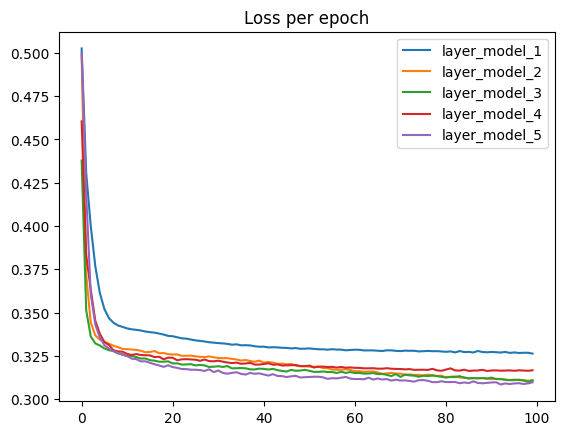

In [60]:
plt.plot(index, layer_model_losses_results["layer_model_1"], label = "layer_model_1")
plt.plot(index, layer_model_losses_results["layer_model_2"], label = "layer_model_2")
plt.plot(index, layer_model_losses_results["layer_model_3"], label = "layer_model_3")
plt.plot(index, layer_model_losses_results["layer_model_4"], label = "layer_model_4")
plt.plot(index, layer_model_losses_results["layer_model_5"], label = "layer_model_5")
plt.title("Loss per epoch")
plt.legend()
plt.show()

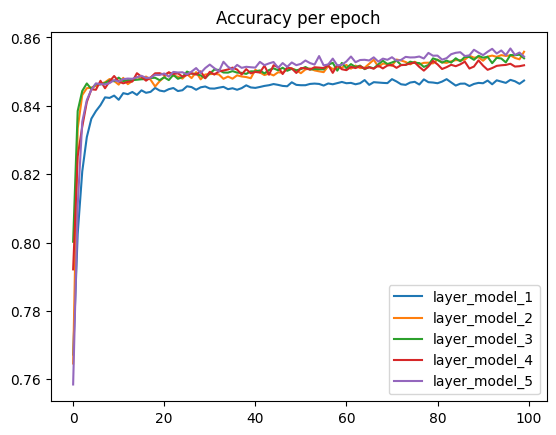

In [61]:
plt.plot(index, layer_model_accuracies_results["layer_model_1"], label = "layer_model_1")
plt.plot(index, layer_model_accuracies_results["layer_model_2"], label = "layer_model_2")
plt.plot(index, layer_model_accuracies_results["layer_model_3"], label = "layer_model_3")
plt.plot(index, layer_model_accuracies_results["layer_model_4"], label = "layer_model_4")
plt.plot(index, layer_model_accuracies_results["layer_model_5"], label = "layer_model_5")
plt.title("Accuracy per epoch")
plt.legend()
plt.show()

## Testing the models against actual data

In [62]:
layer_model_names = ["layer_model_1", "layer_model_2", "layer_model_3", "layer_model_4", "layer_model_5"]
test_accuracies = []
for prediction in predictions:
    a = y_test.values.ravel()   # actual labels
    b = prediction   # predicted labels

    correct = (a == b)
    accuracy = correct.sum() / correct.size
    test_accuracies.append(accuracy)

In [63]:
print(training_times)

[72.92982999999987, 146.77118589999998, 223.38713859999984, 302.5777285000005, 384.33689090000075]


[0.8475523616485474, 0.8520975370063264, 0.8527731711811314, 0.8512990602542841, 0.8505620047908605]


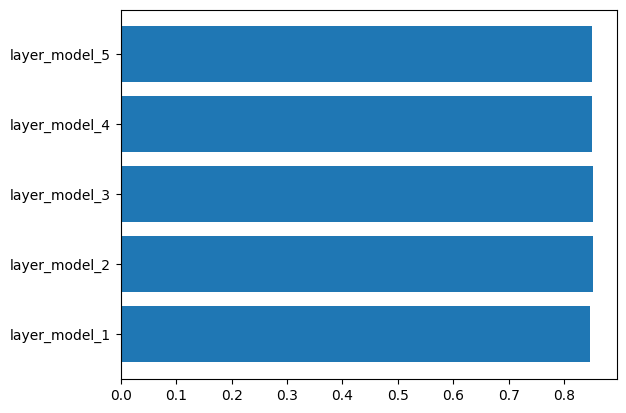

In [64]:
plt.barh(layer_model_names, test_accuracies)
print(test_accuracies)
# Display the plot
plt.show()